# Your Title Here

**Name(s)**: (your name(s) here)

**Website Link**: (your website link)

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
pd.options.plotting.backend = 'plotly'

# from lec_utils import * # Feel free to uncomment and use this. It'll make your plotly graphs look like ours in lecture!

## Step 1: Introduction

In [2]:
dfs = []

# Loop through the desired years, read each CSV, and add it to the list
file_path = f"/Users/tiger.c/Desktop/EECS398/wn25/final-project/data/lol_2024.csv"
df = pd.read_csv(file_path, low_memory=False)
dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
data = pd.concat(dfs, ignore_index=True)


In [3]:
print("There are", df.shape[0], "rows and ", df.shape[1], "columns present in the data.")


There are 117600 rows and  161 columns present in the data.


In [4]:
df['gameid'].nunique()

9800

In [5]:
#Filter the leagues
# data = data[data['league'].isin(['WLDs', 'LCK', 'LPL', 'LEC', 'LTA', 'LCP'])]

#Filter out team data
data = data[data['position'] == 'team']

In [6]:
data.columns[:80]

Index(['gameid', 'datacompleteness', 'url', 'league', 'year', 'split',
       'playoffs', 'date', 'game', 'patch', 'participantid', 'side',
       'position', 'playername', 'playerid', 'teamname', 'teamid', 'champion',
       'ban1', 'ban2', 'ban3', 'ban4', 'ban5', 'pick1', 'pick2', 'pick3',
       'pick4', 'pick5', 'gamelength', 'result', 'kills', 'deaths', 'assists',
       'teamkills', 'teamdeaths', 'doublekills', 'triplekills', 'quadrakills',
       'pentakills', 'firstblood', 'firstbloodkill', 'firstbloodassist',
       'firstbloodvictim', 'team kpm', 'ckpm', 'firstdragon', 'dragons',
       'opp_dragons', 'elementaldrakes', 'opp_elementaldrakes', 'infernals',
       'mountains', 'clouds', 'oceans', 'chemtechs', 'hextechs',
       'dragons (type unknown)', 'elders', 'opp_elders', 'firstherald',
       'heralds', 'opp_heralds', 'void_grubs', 'opp_void_grubs', 'firstbaron',
       'barons', 'opp_barons', 'firsttower', 'towers', 'opp_towers',
       'firstmidtower', 'firsttothreetowe

In [7]:
print("There are", data.shape[0], "rows and ", data.shape[1], "columns present in the data.")


There are 19600 rows and  161 columns present in the data.


In [8]:
columns_to_check = [
    'goldat25', 'xpat25', 'csat25', 'opp_goldat25', 'opp_xpat25', 'opp_csat25',
    'golddiffat25', 'xpdiffat25', 'csdiffat25',
    'killsat25', 'assistsat25', 'deathsat25',
    'opp_killsat25', 'opp_assistsat25', 'opp_deathsat25'
]

In [9]:
data[columns_to_check].isna().mean()

goldat25           0.20102
xpat25             0.20102
csat25             0.20102
opp_goldat25       0.20102
opp_xpat25         0.20102
opp_csat25         0.20102
golddiffat25       0.20102
xpdiffat25         0.20102
csdiffat25         0.20102
killsat25          0.20102
assistsat25        0.20102
deathsat25         0.20102
opp_killsat25      0.20102
opp_assistsat25    0.20102
opp_deathsat25     0.20102
dtype: float64

In [10]:
# Data Cleaning. Because we need all these variables, and datapoints that don't have one of these variables are likely to have
# missed all of them, we therefore simply dropped all the rows with missing values.
columns_to_check = [
    'goldat25', 'xpat25', 'csat25', 'opp_goldat25', 'opp_xpat25', 'opp_csat25',
    'golddiffat25', 'xpdiffat25', 'csdiffat25',
    'killsat25', 'assistsat25', 'deathsat25',
    'opp_killsat25', 'opp_assistsat25', 'opp_deathsat25'
]

data = data.dropna(subset=columns_to_check)

In [11]:
data.shape[0]

15660

In [12]:
# corr_matrix = X.corr()

# # Visualize the correlation matrix
# sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
# plt.show()

In [13]:
columns_to_check = [
    'goldat25', 'xpat25', 'csat25', 'killsat25','deathsat25', 'opp_goldat25', 'opp_xpat25', 'opp_csat25'
]


In [14]:
data.columns[:75]

Index(['gameid', 'datacompleteness', 'url', 'league', 'year', 'split',
       'playoffs', 'date', 'game', 'patch', 'participantid', 'side',
       'position', 'playername', 'playerid', 'teamname', 'teamid', 'champion',
       'ban1', 'ban2', 'ban3', 'ban4', 'ban5', 'pick1', 'pick2', 'pick3',
       'pick4', 'pick5', 'gamelength', 'result', 'kills', 'deaths', 'assists',
       'teamkills', 'teamdeaths', 'doublekills', 'triplekills', 'quadrakills',
       'pentakills', 'firstblood', 'firstbloodkill', 'firstbloodassist',
       'firstbloodvictim', 'team kpm', 'ckpm', 'firstdragon', 'dragons',
       'opp_dragons', 'elementaldrakes', 'opp_elementaldrakes', 'infernals',
       'mountains', 'clouds', 'oceans', 'chemtechs', 'hextechs',
       'dragons (type unknown)', 'elders', 'opp_elders', 'firstherald',
       'heralds', 'opp_heralds', 'void_grubs', 'opp_void_grubs', 'firstbaron',
       'barons', 'opp_barons', 'firsttower', 'towers', 'opp_towers',
       'firstmidtower', 'firsttothreetowe

In [15]:
# Splitting into training and testing sets:
cols = ['gameid']+['result'] + columns_to_check
mod_data = data.copy()
data_part1 = mod_data[cols]
y = data_part1['result']
X = data_part1[['goldat25', 'xpat25', 'csat25', 'killsat25','deathsat25']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=103) 


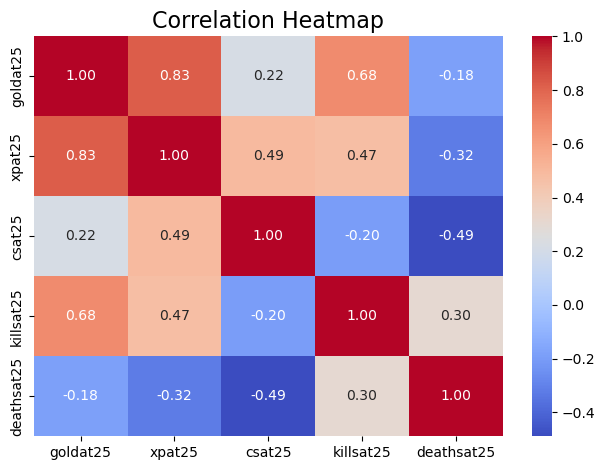

In [16]:
corr_matrix = X.corr()

# Visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap', fontsize=16)
plt.tight_layout()
#plt.savefig('/Users/tiger.c/Desktop/EECS398/wn25/League_of_Legends_Analysis/images/corr_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

In [17]:
# print(data.head().to_markdown(index=False))

In [18]:
data['.head()

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat25,golddiffat25,xpdiffat25,csdiffat25,killsat25,assistsat25,deathsat25,opp_killsat25,opp_assistsat25,opp_deathsat25
190,LOLTMNT99_132542,complete,NaN,TSC,2024,Winter,0,2024-01-05 14:08:39,1,14.01,...,752.0,12741.0,10827.0,79.0,20.0,47.0,7.0,7.0,14.0,20.0
191,LOLTMNT99_132542,complete,NaN,TSC,2024,Winter,0,2024-01-05 14:08:39,1,14.01,...,831.0,-12741.0,-10827.0,-79.0,7.0,14.0,20.0,20.0,47.0,7.0
202,LOLTMNT99_132665,complete,NaN,TSC,2024,Winter,0,2024-01-05 15:03:35,1,14.01,...,825.0,1459.0,3393.0,25.0,17.0,28.0,11.0,11.0,15.0,17.0
203,LOLTMNT99_132665,complete,NaN,TSC,2024,Winter,0,2024-01-05 15:03:35,1,14.01,...,850.0,-1459.0,-3393.0,-25.0,11.0,15.0,17.0,17.0,28.0,11.0
214,LOLTMNT99_132755,complete,NaN,TSC,2024,Winter,0,2024-01-05 16:10:07,1,14.01,...,854.0,1092.0,2266.0,-32.0,10.0,19.0,7.0,7.0,11.0,10.0


In [19]:
# Data Cleaning Completed

In [20]:
Model_selection_df = pd.DataFrame(columns = ['Model Name','num_non_zero','best_C','best_lambda','training_accuracy','testing_accuracy','ROC_accuracy'])

In [21]:
#Baseline model, simple logistic regression
pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=398, solver='liblinear') 
)

pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)
testing_accuracy = accuracy_score(y_test, y_pred)

# Extract the logistic regression estimator from the pipeline
log_reg_cv = pipeline.named_steps['logisticregression']
num_non_zero = np.count_nonzero(log_reg_cv.coef_[0])
roc_auc = roc_auc_score(y_test, pipeline.decision_function(X_test))

# Evaluate on training data
y_train_pred = pipeline.predict(X_train)
training_accuracy = accuracy_score(y_train, y_train_pred)

# Append model results to the results dataframe
new_row = {
    'Model Name': 'Baseline_Simple_Logistic_Regression',
    'num_non_zero': num_non_zero,
    'best_C': '-',
    'best_lambda': '-',
    'training_accuracy': training_accuracy,
    'testing_accuracy': testing_accuracy,
    'ROC_accuracy': roc_auc
}

Model_selection_df = pd.concat([Model_selection_df, pd.DataFrame([new_row])], ignore_index=True)

# Display the updated Model_selection_df
print(Model_selection_df.to_markdown(index=False))


| Model Name                          |   num_non_zero | best_C   | best_lambda   |   training_accuracy |   testing_accuracy |   ROC_accuracy |
|:------------------------------------|---------------:|:---------|:--------------|--------------------:|-------------------:|---------------:|
| Baseline_Simple_Logistic_Regression |              5 | -        | -             |            0.809433 |           0.812473 |       0.897624 |


/var/folders/91/j3k25b391lv5t2z7dsh5s1b00000gn/T/ipykernel_17103/4104726222.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  Model_selection_df = pd.concat([Model_selection_df, pd.DataFrame([new_row])], ignore_index=True)


In [22]:
#Final Model Steps

In [23]:
# Enginearing New Features

In [24]:
data.columns

Index(['gameid', 'datacompleteness', 'url', 'league', 'year', 'split',
       'playoffs', 'date', 'game', 'patch',
       ...
       'opp_csat25', 'golddiffat25', 'xpdiffat25', 'csdiffat25', 'killsat25',
       'assistsat25', 'deathsat25', 'opp_killsat25', 'opp_assistsat25',
       'opp_deathsat25'],
      dtype='object', length=161)

In [25]:
data['side_binary'] = data['side'].map({'Blue': 0, 'Red': 1})
cols = ['gameid']+['result'] + columns_to_check + ['side_binary'] + ['gamelength'] + ['league']
data = data[cols]
y = data['result']
X = data[columns_to_check+ ['side_binary'] + ['gamelength'] + ['league']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=103) 

In [26]:
#First model, using LogisticRegressionCV not aiming for large value of lambda
# 1. Define your feature groups
numeric_feats     = columns_to_check + ['gamelength','side_binary']
categorical_feats = ['league']

# 2. Build the ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', StandardScaler(),       numeric_feats),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_feats)
], remainder='drop')  # drop any other columns like gameid

# 3. Assemble the pipeline with make_pipeline
pipeline = make_pipeline(
    preprocessor,
    LogisticRegressionCV(
        cv=5,
        penalty='l1',
        solver='liblinear',
        random_state=398
    )
)

# 4. Fit on training data
pipeline.fit(X_train, y_train)

# 5. Evaluate on test set
y_test_pred   = pipeline.predict(X_test)
y_test_score  = pipeline.decision_function(X_test)
testing_accuracy = accuracy_score(y_test, y_test_pred)
roc_auc          = roc_auc_score(y_test, y_test_score)

# 6. Extract the trained LogisticRegressionCV step
log_reg_cv = pipeline.named_steps['logisticregressioncv']
best_C      = log_reg_cv.C_[0]
best_lambda = 1.0 / best_C
# 7. Recover feature names from the preprocessor step
feature_names = pipeline.named_steps['columntransformer'] \
                       .get_feature_names_out()

# 8. Map coefficients back to names
coef_series = pd.Series(
    log_reg_cv.coef_[0],
    index=feature_names
)

# 9. Identify non-zero features
selected_features = coef_series[coef_series != 0].index.tolist()
num_non_zero      = len(selected_features)

print("Selected features with non-zero coefficients:")
print(selected_features)

# 10. Compute training accuracy
y_train_pred     = pipeline.predict(X_train)
training_accuracy = accuracy_score(y_train, y_train_pred)

# 11. Append results to Model_selection_df via .loc
new_row = {
    'Model Name':        'LogisticRegressionCV_L1',
    'num_non_zero':      num_non_zero,
    'best_C': best_C,
    'best_lambda': best_lambda,
    'training_accuracy': training_accuracy,
    'testing_accuracy':  testing_accuracy,
    'ROC_accuracy':      roc_auc
}

Model_selection_df.loc[len(Model_selection_df)] = new_row

# 12. Display your updated results
print("\nUpdated Model_selection_df:")
print(Model_selection_df.to_markdown(index=False))

Selected features with non-zero coefficients:
['num__goldat25', 'num__xpat25', 'num__csat25', 'num__killsat25', 'num__deathsat25', 'num__opp_goldat25', 'num__opp_xpat25', 'num__opp_csat25', 'num__side_binary']

Updated Model_selection_df:
| Model Name                          |   num_non_zero | best_C               | best_lambda        |   training_accuracy |   testing_accuracy |   ROC_accuracy |
|:------------------------------------|---------------:|:---------------------|:-------------------|--------------------:|-------------------:|---------------:|
| Baseline_Simple_Logistic_Regression |              5 | -                    | -                  |            0.809433 |           0.812473 |       0.897624 |
| LogisticRegressionCV_L1             |              9 | 0.046415888336127774 | 21.544346900318843 |            0.835888 |           0.8361   |       0.921376 |


In [27]:
clf = pipeline.named_steps['logisticregressioncv']
intercept = clf.intercept_[0]
coefs     = dict(zip(
    pipeline
      .named_steps['columntransformer']
      .get_feature_names_out(),
    clf.coef_[0]
))
print("INTERCEPT =", intercept)
print("COEFFS =", coefs)


INTERCEPT = 0.0
COEFFS = {'num__goldat25': 1.067025652955457, 'num__xpat25': 0.4510989408105142, 'num__csat25': 0.13120807738532853, 'num__killsat25': 0.2395581097696759, 'num__deathsat25': -0.1854600337761948, 'num__opp_goldat25': -1.0255959899001337, 'num__opp_xpat25': -0.524448390866887, 'num__opp_csat25': -0.07209074041461708, 'num__gamelength': 0.0, 'num__side_binary': 0.030975846460599327, 'cat__league_AC': 0.0, 'cat__league_AL': 0.0, 'cat__league_CBLOL': 0.0, 'cat__league_CBLOLA': 0.0, 'cat__league_CDF': 0.0, 'cat__league_CT': 0.0, 'cat__league_EBL': 0.0, 'cat__league_EBLPA': 0.0, 'cat__league_EM': 0.0, 'cat__league_EPL': 0.0, 'cat__league_ESLOL': 0.0, 'cat__league_EWC': 0.0, 'cat__league_GLL': 0.0, 'cat__league_GLLPA': 0.0, 'cat__league_HC': 0.0, 'cat__league_HM': 0.0, 'cat__league_HW': 0.0, 'cat__league_IC': 0.0, 'cat__league_KeSPA': 0.0, 'cat__league_LAS': 0.0, 'cat__league_LCK': 0.0, 'cat__league_LCKC': 0.0, 'cat__league_LCO': 0.0, 'cat__league_LCS': 0.0, 'cat__league_LEC': 

In [27]:
#Third Model, Ridge_Logistic_Regression
pipeline_ridge = make_pipeline(
    preprocessor,  # scales numeric + one‑hot encodes categorical
    LogisticRegressionCV(
        cv=5,
        penalty='l2',
        solver='liblinear',
        random_state=398
    )
)

# 2. Fit on the training data
pipeline_ridge.fit(X_train, y_train)

# 3. Evaluate on test & training sets
y_pred_ridge        = pipeline_ridge.predict(X_test)
testing_accuracy_ridge  = accuracy_score(y_test, y_pred_ridge)
y_train_pred_ridge      = pipeline_ridge.predict(X_train)
training_accuracy_ridge = accuracy_score(y_train, y_train_pred_ridge)
roc_auc_ridge           = roc_auc_score(
    y_test,
    pipeline_ridge.decision_function(X_test)
)

# 4. Extract feature names and coefficients
ridge_model      = pipeline_ridge.named_steps['logisticregressioncv']
feature_names    = pipeline_ridge.named_steps['columntransformer'] \
                                 .get_feature_names_out()
coef_series_ridge = pd.Series(
    ridge_model.coef_[0],
    index=feature_names
)
num_non_zero_ridge = (coef_series_ridge != 0).sum()

log_reg_cv = pipeline.named_steps['logisticregressioncv']
best_C      = log_reg_cv.C_[0]
best_lambda = 1.0 / best_C

# 5. Append results via .loc (avoids concat warnings)
Model_selection_df.loc[len(Model_selection_df)] = {
    'Model Name':        'Ridge_LogisticRegressionCV',
    'num_non_zero':      num_non_zero_ridge,
    'best_C': best_C,
    'best_lambda': best_lambda,
    'training_accuracy': training_accuracy_ridge,
    'testing_accuracy':  testing_accuracy_ridge,
    'ROC_accuracy':      roc_auc_ridge
}

# 6. Display updated results
print(Model_selection_df.to_markdown(index=False))

| Model Name                          |   num_non_zero | best_C               | best_lambda        |   training_accuracy |   testing_accuracy |   ROC_accuracy |
|:------------------------------------|---------------:|:---------------------|:-------------------|--------------------:|-------------------:|---------------:|
| Baseline_Simple_Logistic_Regression |              5 | -                    | -                  |            0.809433 |           0.812473 |       0.897624 |
| LogisticRegressionCV_L1             |              9 | 0.046415888336127774 | 21.544346900318843 |            0.835888 |           0.8361   |       0.921376 |
| Ridge_LogisticRegressionCV          |             57 | 0.046415888336127774 | 21.544346900318843 |            0.835979 |           0.836526 |       0.921788 |


In [28]:
#Fourth model, backwards elimination
# Base estimator for RFE
base_model = LogisticRegression(solver='liblinear', penalty='l1', random_state=398)

# 1. Build the RFECV pipeline (reusing the preprocessor from before)
pipeline_rfecv = make_pipeline(
    preprocessor,  # ColumnTransformer defined earlier
    RFECV(
        estimator=base_model,
        cv=5,
        scoring='roc_auc',
        step=1
    )
)

# 2. Fit on the training data
pipeline_rfecv.fit(X_train, y_train)

# 3. Evaluate on test & training sets
y_pred_rfecv         = pipeline_rfecv.predict(X_test)
testing_accuracy_rfecv  = accuracy_score(y_test, y_pred_rfecv)
roc_auc_rfecv           = roc_auc_score(y_test, pipeline_rfecv.decision_function(X_test))

y_train_pred_rfecv      = pipeline_rfecv.predict(X_train)
training_accuracy_rfecv = accuracy_score(y_train, y_train_pred_rfecv)

# 4. Recover feature names and RFECV support mask
feature_names   = pipeline_rfecv.named_steps['columntransformer'].get_feature_names_out()
rfecv_step      = pipeline_rfecv.named_steps['rfecv']
support_mask    = rfecv_step.support_
selected_features = feature_names[support_mask].tolist()

# 5. Count non-zero coefficients from the selected features
coef_selected = pd.Series(rfecv_step.estimator_.coef_[0], index=selected_features)
num_non_zero_rfecv = np.count_nonzero(coef_selected)

print("Selected features after RFECV:")
print(selected_features)

# 6. Append results to Model_selection_df via .loc
Model_selection_df.loc[len(Model_selection_df)] = {
    'Model Name':        'LogisticRegression_RFECV_BackwardElimination',
    'num_non_zero':      num_non_zero_rfecv,
    'best_C': '-',
    'best_lambda': '-',
    'training_accuracy': training_accuracy_rfecv,
    'testing_accuracy':  testing_accuracy_rfecv,
    'ROC_accuracy':      roc_auc_rfecv
}

# 7. Display the updated results
print(Model_selection_df.to_markdown(index=False))

Selected features after RFECV:
['num__goldat25', 'num__xpat25', 'num__killsat25', 'num__opp_goldat25', 'num__opp_xpat25']
| Model Name                                   |   num_non_zero | best_C               | best_lambda        |   training_accuracy |   testing_accuracy |   ROC_accuracy |
|:---------------------------------------------|---------------:|:---------------------|:-------------------|--------------------:|-------------------:|---------------:|
| Baseline_Simple_Logistic_Regression          |              5 | -                    | -                  |            0.809433 |           0.812473 |       0.897624 |
| LogisticRegressionCV_L1                      |              9 | 0.046415888336127774 | 21.544346900318843 |            0.835888 |           0.8361   |       0.921376 |
| Ridge_LogisticRegressionCV                   |             57 | 0.046415888336127774 | 21.544346900318843 |            0.835979 |           0.836526 |       0.921788 |
| LogisticRegression_RFECV_B

In [29]:
# # visualizing coefficients for model 3
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Extract the support mask from the RFECV step
# support_mask = pipeline_rfecv.named_steps['rfecv'].support_

# # Get the list of selected features using the support mask.
# selected_features = np.array(columns_to_check)[support_mask]

# # Extract the coefficients from the best estimator obtained via RFECV.
# best_model = pipeline_rfecv.named_steps['rfecv'].estimator_
# # For binary classification, best_model.coef_ is a 2D array of shape (1, n_selected_features)
# coefficients = best_model.coef_[0]

# # Create a DataFrame with feature names and their corresponding coefficients.
# coef_df_model3 = pd.DataFrame({
#     'Feature': selected_features,
#     'Coefficient': coefficients
# })

# # Calculate the absolute values for sorting purposes.
# coef_df_model3['abs_coefficient'] = coef_df_model3['Coefficient'].abs()

# # Sort the DataFrame by the absolute coefficient values in descending order.
# coef_df_model3_sorted = coef_df_model3.sort_values(by='abs_coefficient', ascending=False)

# # Plot the selected coefficients as a horizontal bar chart.
# plt.figure(figsize=(10, 8))
# sns.barplot(x='abs_coefficient', y='Feature', data=coef_df_model3_sorted, palette='viridis')
# plt.title('Selected Features by Absolute Coefficient Value\n(LogisticRegression_RFECV_BackwardElimination)')
# plt.xlabel('Absolute Coefficient Value')
# plt.ylabel('Feature')
# plt.tight_layout()
# plt.show()


In [31]:
#---------------------------------------------------------Line of Useful Content----------------------------------------------------------------------

In [32]:
log_reg_cv = pipeline.named_steps['logisticregressioncv']
print("Chosen C value:", log_reg_cv.C_)

Chosen C value: [0.1]


In [33]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
vif = pd.DataFrame()
vif['feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

        feature          VIF
0      goldat25  1123.070327
1        xpat25  1045.466236
2        csat25   877.857413
3     killsat25    21.925068
4    deathsat25    21.987102
5  opp_goldat25  1122.499135
6    opp_xpat25  1046.296931
7    opp_csat25   879.111988


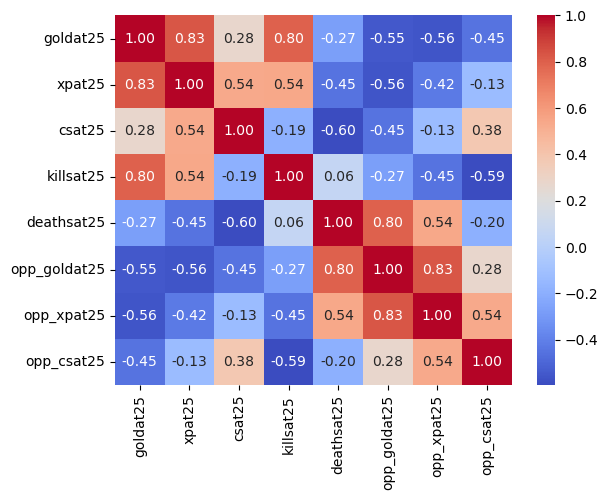

In [34]:
corr_matrix = X.corr()

# Visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

Accuracy: 0.8275862068965517


/var/folders/91/j3k25b391lv5t2z7dsh5s1b00000gn/T/ipykernel_83841/1286274977.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='abs_coefficient', y='Feature', data=coef_df.head(20), palette='viridis')


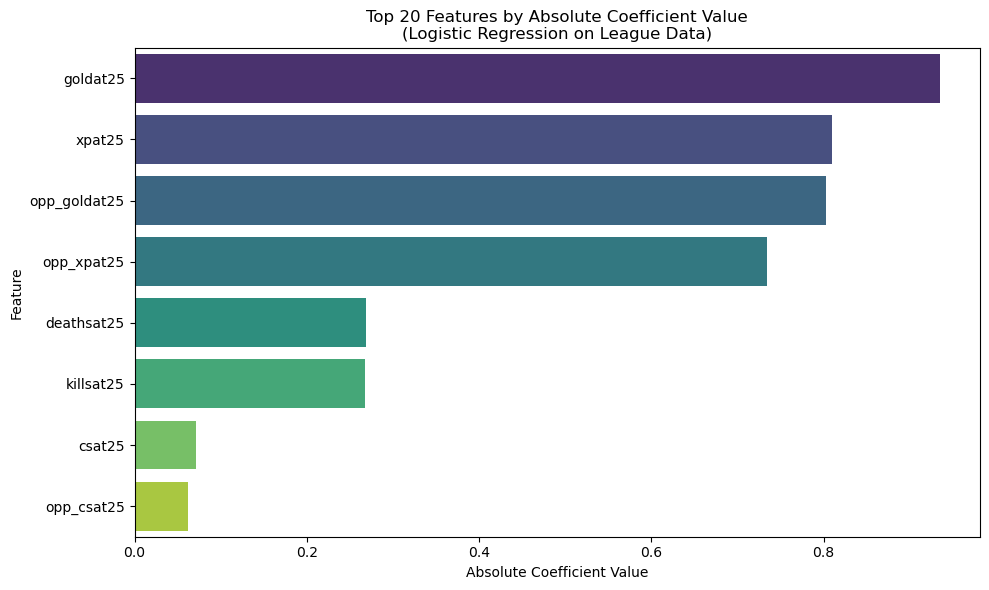

In [35]:
#I think we should use a thing called LogisticRegressionCV rather than LASSO, cuz we are doing classification.

# yea okok i will try that beloww check the logisticregression out (this was inspired by hw10) how is it? its colorful lol

# Split the dataset into training and testing sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=398, test_size=0.2)

# --- Model Pipeline (Logistic Regression Inspired by HW10) ---

# Create a pipeline that scales the features and then fits a logistic regression model.
pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=398, solver='liblinear')  # solver supports L1 if needed, here default L2 is used
)

# Fit the model.
pipeline.fit(X_train, y_train)

# Predict on the test set.
y_pred = pipeline.predict(X_test)

# Calculate the accuracy.
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# --- Extract and Plot Coefficients ---

# Get the logistic regression model from the pipeline.
logreg = pipeline.named_steps['logisticregression']

# For binary classification, coefficients are in a 1D array (logreg.coef_ has shape (1, n_features)).
coefficients = logreg.coef_[0]

# Create a DataFrame with feature names and corresponding coefficients.
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
coef_df['abs_coefficient'] = coef_df['Coefficient'].abs()

# Sort the DataFrame by absolute coefficient value (largest influence first).
coef_df = coef_df.sort_values(by='abs_coefficient', ascending=False)

# Plot the top 20 features by absolute coefficient.
plt.figure(figsize=(10, 6))
sns.barplot(x='abs_coefficient', y='Feature', data=coef_df.head(20), palette='viridis')
plt.title('Top 20 Features by Absolute Coefficient Value\n(Logistic Regression on League Data)')
plt.xlabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()


Mean Squared Error: 0.13845772087637384


Text(0.5, 0, 'Absolute Coefficient Value')

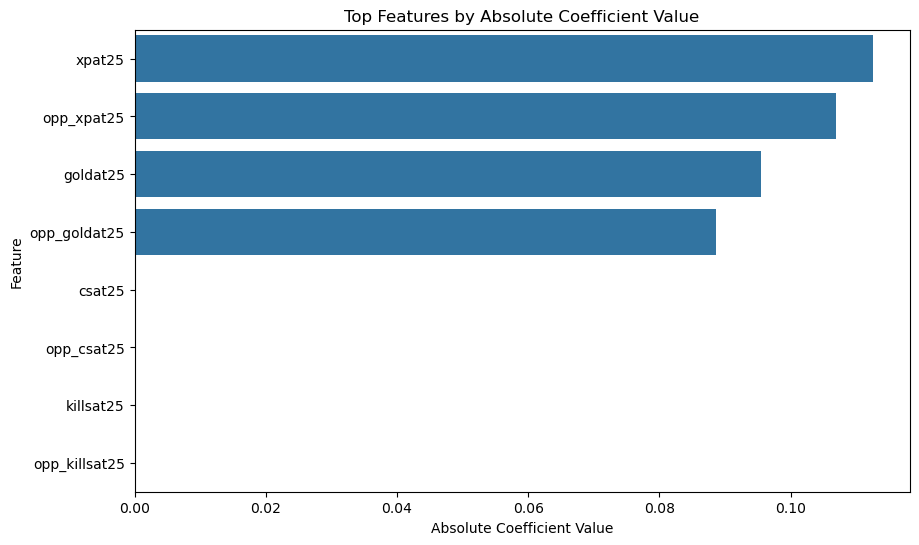

In [32]:
#Create model pipeline
pipeline = make_pipeline(
    StandardScaler(),
    LassoCV(cv = 10, random_state = 398)
)

#Fit the model
pipeline.fit(X_train, y_train)
#Predict the test set
y_pred = pipeline.predict(X_test)
#Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
#Calculate the accuracy doesnt work for some reason lol
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)
#Calculate the coefficients
lasso = pipeline.named_steps['lassocv']
coefficients = lasso.coef_
#Get the feature names
feature_names = X.columns
#Create a DataFrame with the feature names and coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
#Sort the DataFrame by absolute value of coefficients
coef_df['abs_coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='abs_coefficient', ascending=False)
#Plot the coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='abs_coefficient', y='Feature', data=coef_df.head(20))
plt.title('Top Features by Absolute Coefficient Value')
plt.xlabel('Absolute Coefficient Value')


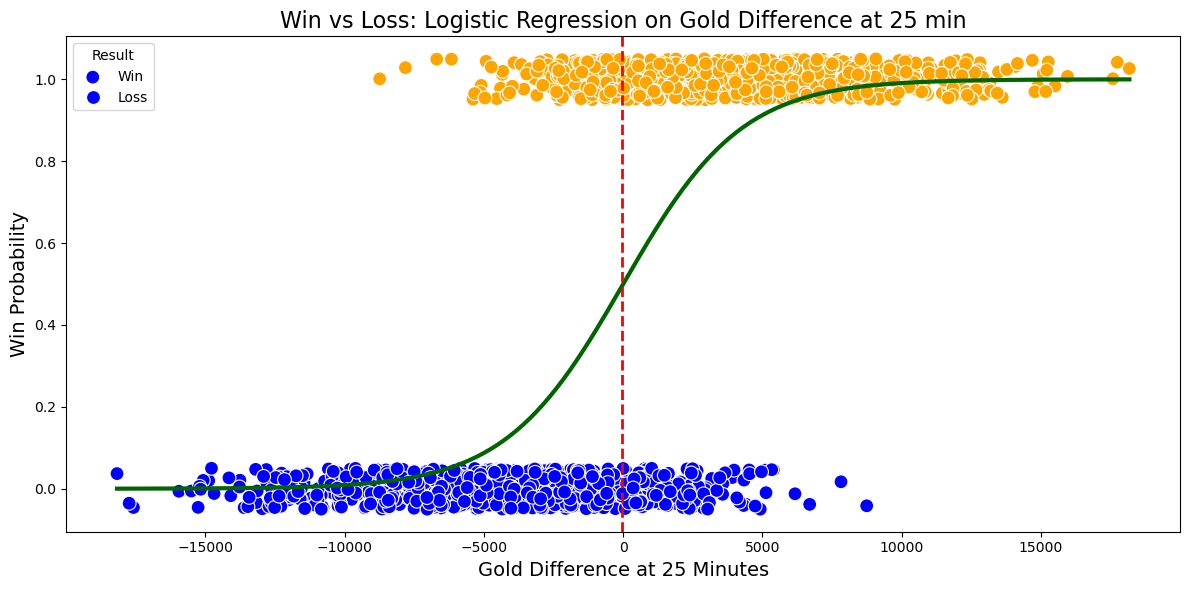

In [33]:
# Fit logistic regression model
X = data[['golddiffat25']]
y = data['result']
model = LogisticRegression()
model.fit(X, y)

# Create a range of values for prediction
gold_range = np.linspace(X.min().values[0], X.max().values[0], 300).reshape(-1, 1)
gold_range_df = pd.DataFrame(gold_range, columns=['golddiffat25'])
predicted_probs = model.predict_proba(gold_range_df)[:, 1]

# Add jitter to binary result values for better visibility
np.random.seed(0)
jittered_y = y + np.random.uniform(-0.05, 0.05, size=len(y))

# Plot setup
plt.figure(figsize=(12, 6))

# Scatter plot with jitter
sns.scatterplot(x=data['golddiffat25'], y=jittered_y, hue=y,
                palette={0: 'blue', 1: 'orange'}, legend='full', s=100)

# Logistic regression curve
plt.plot(gold_range, predicted_probs, color='darkgreen', linewidth=3, label='Logistic Regression Model')


# Labels and title
plt.xlabel('Gold Difference at 25 Minutes', fontsize=14)
plt.ylabel('Win Probability', fontsize=14)
plt.title('Win vs Loss: Logistic Regression on Gold Difference at 25 min', fontsize=16)

# Vertical line at decision boundary (P = 0.5)
midpoint_idx = np.argmin(np.abs(predicted_probs - 0.5))
gold_at_50 = gold_range[midpoint_idx][0]
plt.axvline(x=gold_at_50, color='red', linestyle='--', linewidth=2, label='P(Win) = 0.5')

# Customize legend
plt.legend(title='Result', labels=['Win','Loss'])

plt.tight_layout()
plt.show()

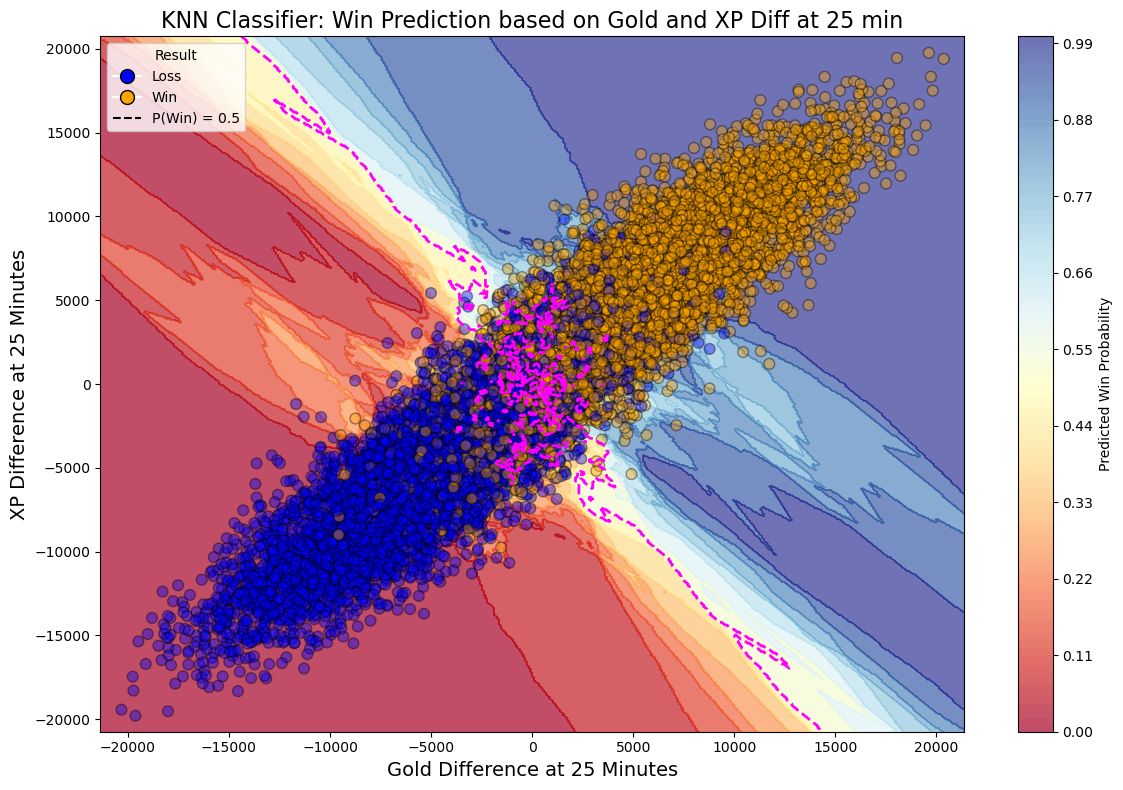

In [30]:
# Define features and target
X = data[['golddiffat25', 'xpdiffat25']]
y = data['result']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit KNN model
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_scaled, y)

# Create meshgrid for plotting
x_min, x_max = X['golddiffat25'].min() - 1000, X['golddiffat25'].max() + 1000
y_min, y_max = X['xpdiffat25'].min() - 1000, X['xpdiffat25'].max() + 1000
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Create DataFrame from mesh and scale it
grid_df = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['golddiffat25', 'xpdiffat25'])
grid_scaled = scaler.transform(grid_df)

# Predict probabilities for each grid point
Z = knn.predict_proba(grid_scaled)[:, 1].reshape(xx.shape)

# Plot setup
plt.figure(figsize=(12, 8))

# Contour map of predicted probabilities
contour = plt.contourf(xx, yy, Z, levels=100, cmap='RdYlBu', alpha=0.7)
plt.colorbar(contour, label='Predicted Win Probability')

# Plot decision boundary (P=0.5)
plt.contour(xx, yy, Z, levels=[0.5], colors='magenta', linewidths=2, linestyles='--')

# Add jittered scatter points
np.random.seed(0)
jitter_x = data['golddiffat25'] + np.random.uniform(-50, 50, size=len(data))
jitter_y = data['xpdiffat25'] + np.random.uniform(-50, 50, size=len(data))

# Custom colormap for points
custom_cmap = ListedColormap(['blue', 'orange'])

# Scatter plot of real data
scatter = plt.scatter(jitter_x, jitter_y, c=y, cmap=custom_cmap,
                      edgecolor='k', s=60, alpha=0.4)

# Labels and title
plt.xlabel('Gold Difference at 25 Minutes', fontsize=14)
plt.ylabel('XP Difference at 25 Minutes', fontsize=14)
plt.title('KNN Classifier: Win Prediction based on Gold and XP Diff at 25 min', fontsize=16)

# Legend
legend_labels = ['Loss', 'Win']
handles = [plt.Line2D([], [], marker='o', color='w', label=legend_labels[i],
                      markerfacecolor=custom_cmap(i), markersize=10, markeredgecolor='k')
           for i in range(2)]
handles.append(plt.Line2D([], [], linestyle='--', color='black', label='P(Win) = 0.5'))
plt.legend(handles=handles, title='Result', loc='upper left')

plt.tight_layout()
plt.show()

In [64]:
# Define features and target
X = data[['golddiffat25']]
y = data['result']

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate model on test data
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy (Test): {accuracy:.3f}")

Logistic Regression Accuracy (Test): 0.849


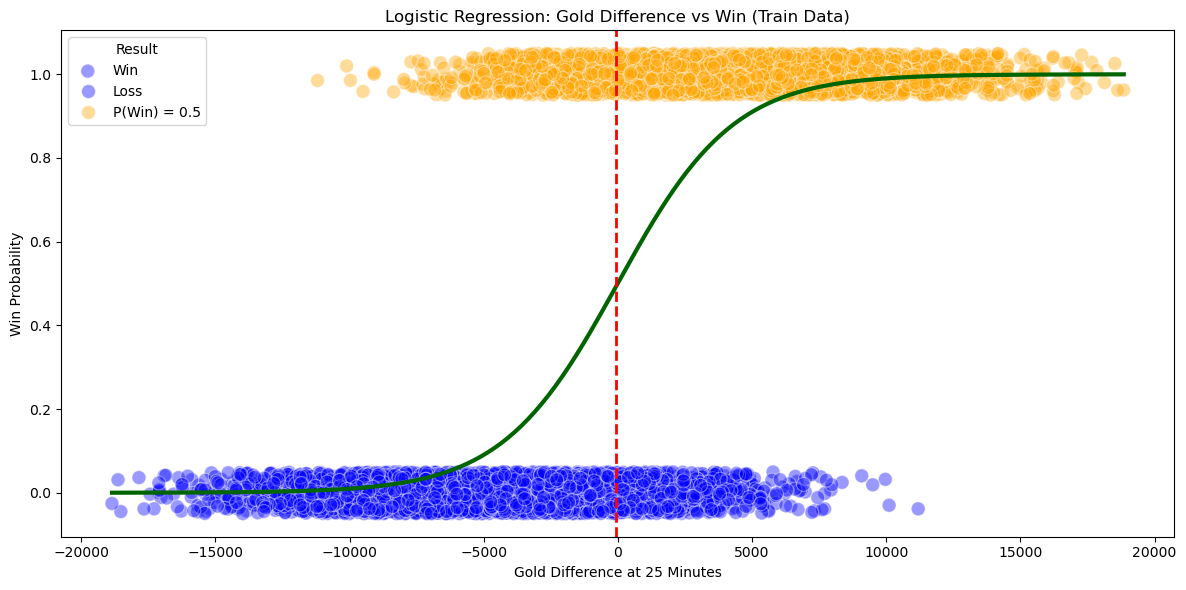

In [65]:
# Create prediction curve from training data range
gold_range = np.linspace(X_train.min().values[0], X_train.max().values[0], 300).reshape(-1, 1)
gold_range_df = pd.DataFrame(gold_range, columns=['golddiffat25'])
predicted_probs = model.predict_proba(gold_range_df)[:, 1]

# Add jitter for visibility
np.random.seed(0)
jittered_y = y_train + np.random.uniform(-0.05, 0.05, size=len(y_train))

# Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x=X_train['golddiffat25'], y=jittered_y, hue=y_train,
                palette={0: 'blue', 1: 'orange'}, legend='full', s=100, alpha=0.4)
plt.plot(gold_range, predicted_probs, color='darkgreen', linewidth=3, label='Logistic Regression Model')

# Add vertical decision boundary (P = 0.5)
midpoint_idx = np.argmin(np.abs(predicted_probs - 0.5))
gold_at_50 = gold_range[midpoint_idx][0]
plt.axvline(x=gold_at_50, color='red', linestyle='--', linewidth=2, label='P(Win) = 0.5')

plt.xlabel('Gold Difference at 25 Minutes')
plt.ylabel('Win Probability')
plt.title('Logistic Regression: Gold Difference vs Win (Train Data)')
plt.legend(title='Result', labels=['Win', 'Loss', 'P(Win) = 0.5'])
plt.tight_layout()
plt.show()


In [66]:
# Define features and target
X = data[['golddiffat25', 'xpdiffat25']]
y = data['result']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on training data
X_test_scaled = scaler.transform(X_test)        # Transform test data with same scaler

# Fit KNN model
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_knn = knn.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, y_pred_knn)

# Print result
print(f"KNN Accuracy (Test): {knn_accuracy:.3f}")

KNN Accuracy (Test): 0.851


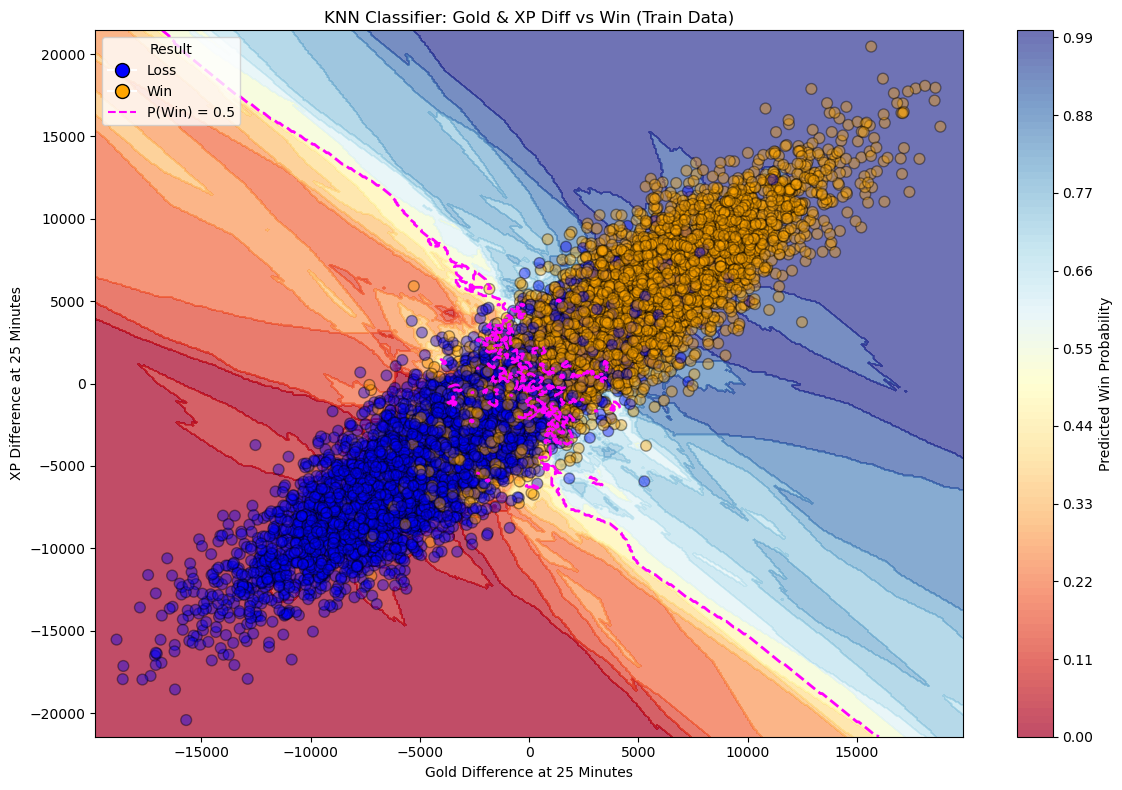

In [67]:
# Meshgrid from training feature range
x_min, x_max = X_train['golddiffat25'].min() - 1000, X_train['golddiffat25'].max() + 1000
y_min, y_max = X_train['xpdiffat25'].min() - 1000, X_train['xpdiffat25'].max() + 1000
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Create DataFrame and scale
grid_df = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['golddiffat25', 'xpdiffat25'])
grid_scaled = scaler.transform(grid_df)

# Predict probabilities for grid
Z = knn.predict_proba(grid_scaled)[:, 1].reshape(xx.shape)

# Plot
plt.figure(figsize=(12, 8))
contour = plt.contourf(xx, yy, Z, levels=100, cmap='RdYlBu', alpha=0.7)
plt.colorbar(contour, label='Predicted Win Probability')

# Decision boundary at P=0.5
plt.contour(xx, yy, Z, levels=[0.5], colors='magenta', linewidths=2, linestyles='--')

# Jittered training points
np.random.seed(0)
jitter_x = X_train['golddiffat25'] + np.random.uniform(-50, 50, size=len(X_train))
jitter_y = X_train['xpdiffat25'] + np.random.uniform(-50, 50, size=len(X_train))
custom_cmap = ListedColormap(['blue', 'orange'])
plt.scatter(jitter_x, jitter_y, c=y_train, cmap=custom_cmap, edgecolor='k', s=60, alpha=0.4)

plt.xlabel('Gold Difference at 25 Minutes')
plt.ylabel('XP Difference at 25 Minutes')
plt.title('KNN Classifier: Gold & XP Diff vs Win (Train Data)')

# Custom legend
legend_labels = ['Loss', 'Win']
handles = [plt.Line2D([], [], marker='o', color='w', label=legend_labels[i],
                      markerfacecolor=custom_cmap(i), markersize=10, markeredgecolor='k')
           for i in range(2)]
handles.append(plt.Line2D([], [], linestyle='--', color='magenta', label='P(Win) = 0.5'))
plt.legend(handles=handles, title='Result', loc='upper left')

plt.tight_layout()
plt.show()


In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Prepare X (exclude target column)
X = data[[ 'goldat25', 'xpat25', 'csat25', 'opp_goldat25', 'opp_xpat25', 'opp_csat25',
    'golddiffat25', 'xpdiffat25', 'csdiffat25',
    'killsat25', 'assistsat25', 'deathsat25',
    'opp_killsat25', 'opp_assistsat25', 'opp_deathsat25']]  # add your predictors
X = add_constant(X)  # VIF needs intercept

vif = pd.DataFrame()
vif['feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)


            feature          VIF
0             const  1099.088247
1          goldat25          inf
2            xpat25          inf
3            csat25          inf
4      opp_goldat25          inf
5        opp_xpat25          inf
6        opp_csat25          inf
7      golddiffat25          inf
8        xpdiffat25          inf
9        csdiffat25          inf
10        killsat25  1699.479052
11      assistsat25     7.913920
12       deathsat25  1690.581523
13    opp_killsat25  1699.479052
14  opp_assistsat25     7.913920
15   opp_deathsat25  1690.581523


/Users/kevinna/miniforge3/envs/pds/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning:

divide by zero encountered in scalar divide



In [69]:
fig_uni1 = px.histogram(data, x='golddiffat25', nbins=50, title='Distribution of Gold Difference at 25 Minutes')
fig_uni1.show()
fig_uni2 = px.histogram(data, x='xpdiffat25', nbins=50, title='Distribution of XP Difference at 25 Minutes')
fig_uni2.show()

In [70]:
fig2 = px.box(data, x='result', y='golddiffat25', title='Gold Difference by Match Outcome')
fig2.show()
fig3 = px.box(data, x='result', y='xpdiffat25', title='XP Difference by Match Outcome')
fig3.show()

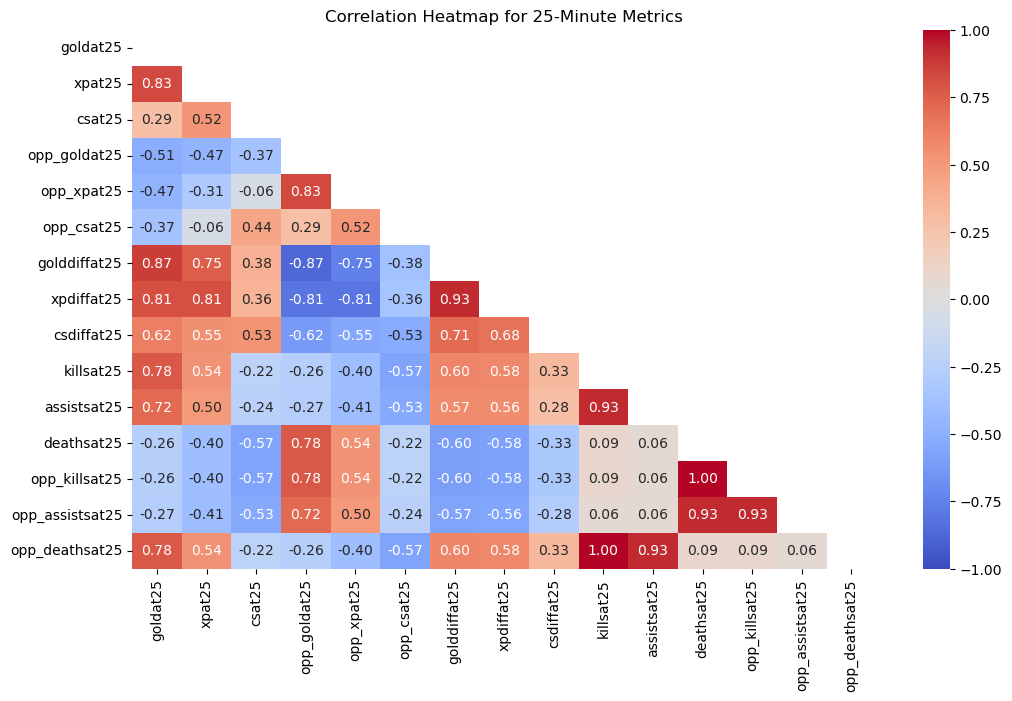

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Ensure pandas is imported

# List of 25-minute related columns
cols_25 = [
    'goldat25', 'xpat25', 'csat25',
    'opp_goldat25', 'opp_xpat25', 'opp_csat25',
    'golddiffat25', 'xpdiffat25', 'csdiffat25',
    'killsat25', 'assistsat25', 'deathsat25',
    'opp_killsat25', 'opp_assistsat25', 'opp_deathsat25'
]

# Check that each column exists in the DataFrame and is numeric
cols_25_numeric = [col for col in cols_25 if col in data.columns and pd.api.types.is_numeric_dtype(data[col])]

# Compute the correlation matrix for the selected numeric columns
corr_matrix_25 = data[cols_25_numeric].corr()

# Create a mask for the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(corr_matrix_25, dtype=bool))

plt.figure(figsize=(12, 7))
sns.heatmap(
    corr_matrix_25,
    mask=mask,
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="coolwarm"
)
plt.title("Correlation Heatmap for 25-Minute Metrics")
plt.show()


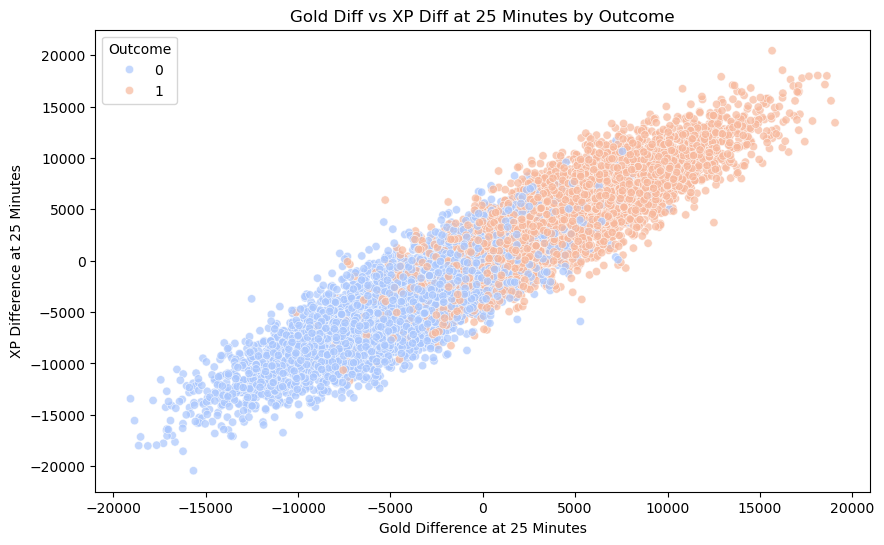

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data, 
    x='golddiffat25', 
    y='xpdiffat25', 
    hue='result',  # assuming 'result' is categorical with win/lose labels
    palette='coolwarm',
    alpha=0.7
)
plt.title("Gold Diff vs XP Diff at 25 Minutes by Outcome")
plt.xlabel("Gold Difference at 25 Minutes")
plt.ylabel("XP Difference at 25 Minutes")
plt.legend(title="Outcome")
plt.show()


/var/folders/nm/ncpg366950vcqcgwcvqfzqpw0000gn/T/ipykernel_54174/337461084.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




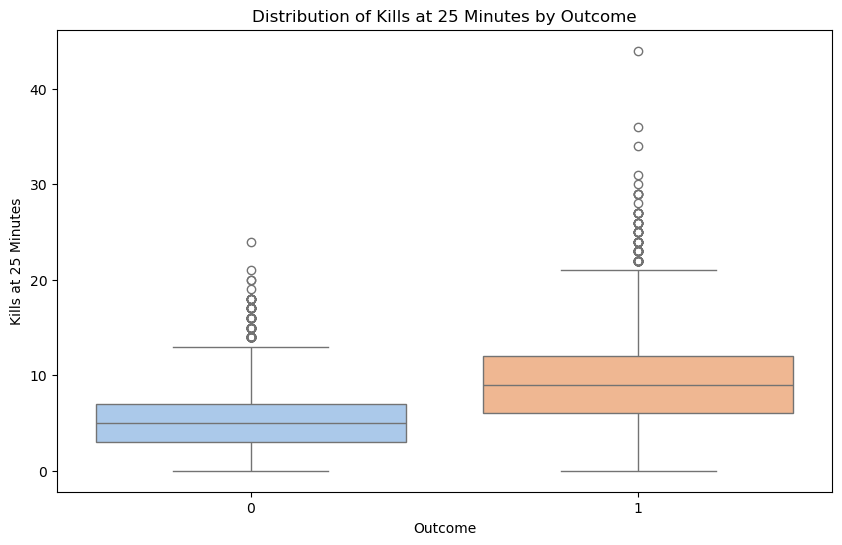

In [73]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data, 
    x='result', 
    y='killsat25',  # replace with another metric if desired
    palette='pastel'
)
plt.title("Distribution of Kills at 25 Minutes by Outcome")
plt.xlabel("Outcome")
plt.ylabel("Kills at 25 Minutes")
plt.show()


In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a binary flag for win outcomes.
data['win_flag'] = data['result'].apply(lambda x: 1 if str(x).lower() == 'win' else 0)

# Group the data by 'position' and 'champion' to compute the number of games played and win rate for each champion in each position.
grouped = data.groupby(['position', 'champion']).agg(
    games=('champion', 'count'),
    win_rate=('win_flag', 'mean')
).reset_index()

# Get the unique roles from the dataset (using the 'position' column).
positions = grouped['position'].unique()

# Loop over each position to plot the top 5 champions by number of games played.
for pos in positions:
    # Filter for the current position.
    pos_df = grouped[grouped['position'] == pos]
    
    # Select the top 5 champions by the number of games played.
    top5 = pos_df.sort_values(by='games', ascending=False).head(5)
    
    # Create a bar plot of win percentage.
    plt.figure(figsize=(8, 6))
    bars = plt.bar(top5['champion'], top5['win_rate'] * 100, color='skyblue')
    plt.xlabel('Champion', fontsize=12)
    plt.ylabel('Win Percentage (%)', fontsize=12)
    plt.title(f'Top 5 Champions in Position: {pos}', fontsize=14)
    plt.ylim(0, 100)
    
    # Annotate bars with win percentage values.
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2, 
            height + 1, 
            f'{height:.1f}%', 
            ha='center', 
            va='bottom', 
            fontsize=10
        )
    
plt.show()


In [75]:
data.isnull().values.any()

True

In [76]:
df['league'].value_counts()

league
NACL          10380
LDL           10272
LPL            9060
LCKC           5904
LCK            5856
VCS            4368
ESLOL          3624
PCS            3516
LEC            3456
LAS            3372
EM             3252
LCS            3168
LJL            3096
LFL2           2988
CBLOLA         2976
LVP SL         2964
UL             2940
CBLOL          2904
PRM            2904
LFL            2904
PGN            2412
LLA            2304
NEXO           2172
TCL            2160
AL             2076
GLL            1980
HM             1944
LPLOL          1920
EBL            1908
NLC            1884
HC             1692
LCO            1680
WLDs           1644
LRS            1428
LRN            1392
LJLA           1104
SL (LATAM)     1080
GL             1068
VL             1056
EPL            1032
DDH            1032
LMF            1032
MSI             912
ASCI            912
IC              876
CDF             864
LHE             708
CT              516
EL              492
DCup         

In [77]:
df['datacompleteness'].value_counts()

datacompleteness
complete    111192
partial      20892
Name: count, dtype: int64

In [78]:
df.isnull().sum()

gameid                   0
datacompleteness         0
url                 111192
league                   0
year                     0
                     ...  
assistsat25          28956
deathsat25           28956
opp_killsat25        28956
opp_assistsat25      28956
opp_deathsat25       28956
Length: 161, dtype: int64

In [79]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,132084.0,2023.034160,0.181641,2023.00,2023.00,2023.0,2023.00,2024.00
playoffs,132084.0,0.207777,0.405718,0.00,0.00,0.0,0.00,1.00
game,132084.0,1.649677,0.941808,1.00,1.00,1.0,2.00,5.00
patch,131964.0,13.085906,0.056519,13.01,13.04,13.1,13.13,13.24
participantid,132084.0,29.583333,57.650686,1.00,3.75,6.5,9.25,200.00
...,...,...,...,...,...,...,...,...
assistsat25,103128.0,6.409782,8.153015,0.00,2.00,4.0,7.00,86.00
deathsat25,103128.0,3.016989,3.734888,0.00,1.00,2.0,4.00,41.00
opp_killsat25,103128.0,3.010453,3.891519,0.00,1.00,2.0,4.00,41.00
opp_assistsat25,103128.0,6.409782,8.153015,0.00,2.00,4.0,7.00,86.00


In [80]:
dfs = []
for year in range(2019, 2025):
    file_path = f"lol_{year}.csv"
    dfstuff = pd.read_csv(file_path, low_memory=False)
    dfs.append(dfstuff)
data = pd.concat(dfs, ignore_index=True)

FileNotFoundError: [Errno 2] No such file or directory: 'lol_2019.csv'

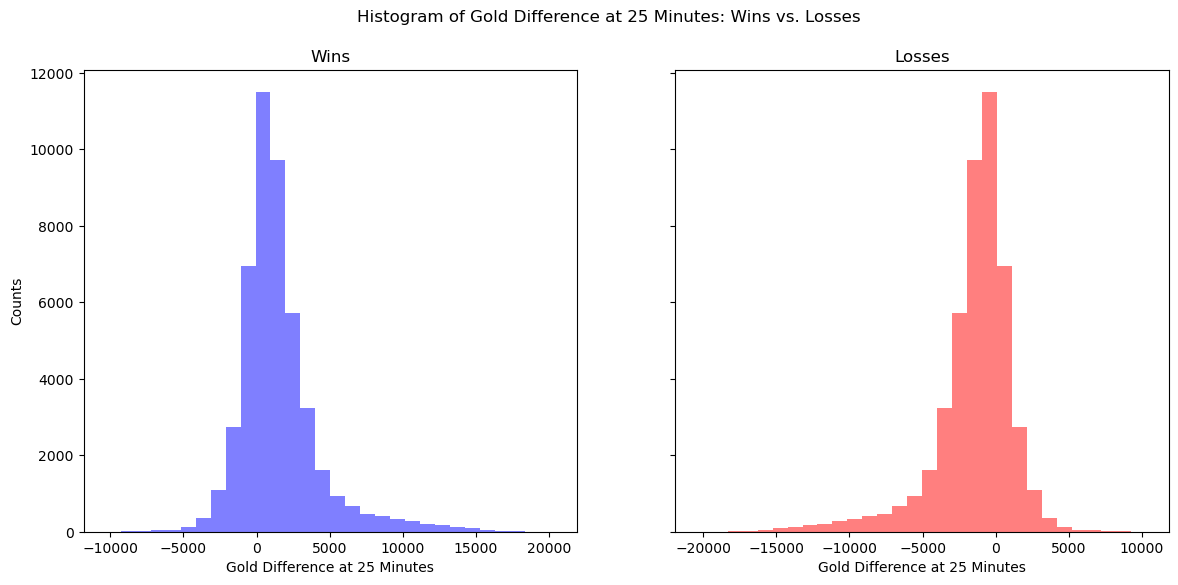

In [ ]:
import matplotlib.pyplot as plt

# Create subplots: 1 row, 2 columns, sharing the same y-axis.
fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Histogram for wins (result == 1)
ax[0].hist(df[df['result'] == 1]['golddiffat25'], bins=30, alpha=0.5, color='blue')
ax[0].set_title('Wins')
ax[0].set_xlabel('Gold Difference at 25 Minutes')
ax[0].set_ylabel('Counts')

# Histogram for losses (result == 0)
ax[1].hist(df[df['result'] == 0]['golddiffat25'], bins=30, alpha=0.5, color='red')
ax[1].set_title('Losses')
ax[1].set_xlabel('Gold Difference at 25 Minutes')

# Overall title for the figure.
plt.suptitle('Histogram of Gold Difference at 25 Minutes: Wins vs. Losses')

# Display the plot.
plt.show()


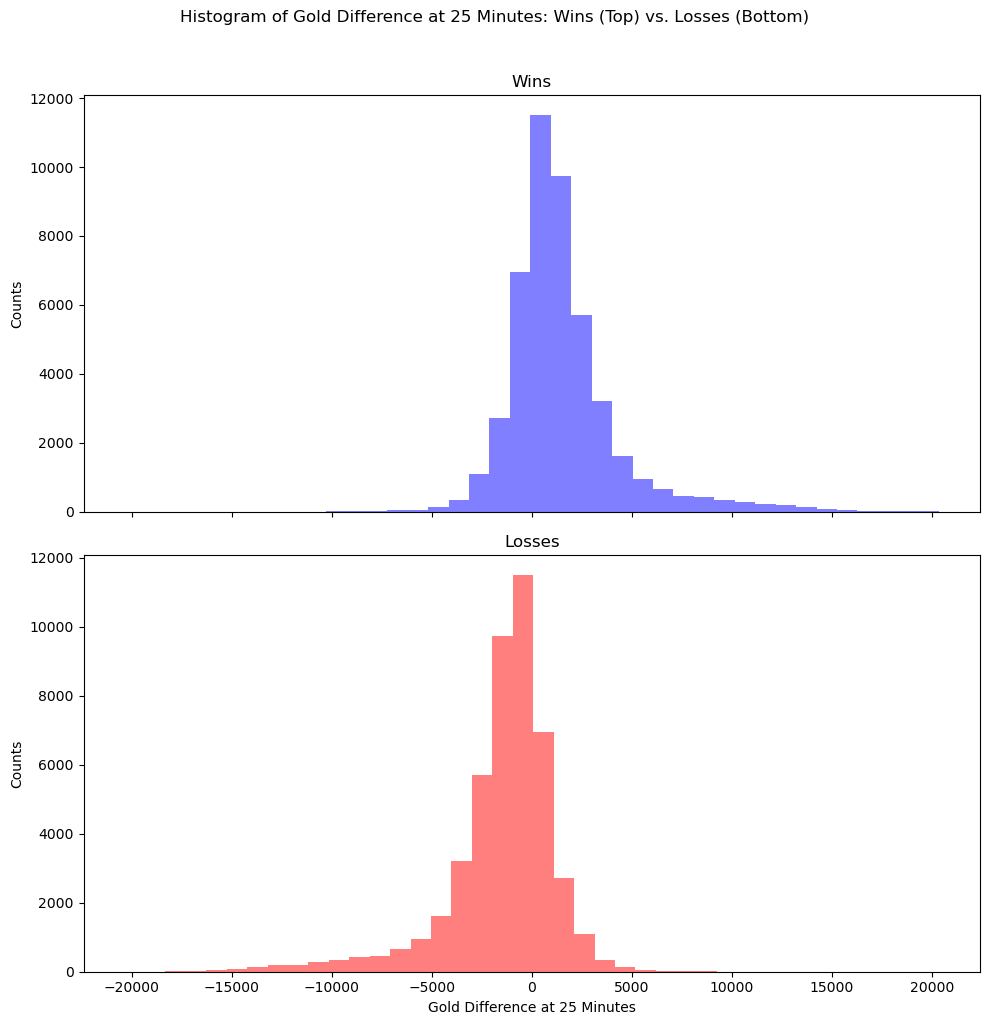

In [ ]:
import matplotlib.pyplot as plt

# Create subplots: 2 rows, 1 column, sharing the x-axis.
fig, ax = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# Histogram for wins (result == 1) in the top subplot.
ax[0].hist(df[df['result'] == 1]['golddiffat25'], bins=30, alpha=0.5, color='blue')
ax[0].set_title('Wins')
ax[0].set_ylabel('Counts')

# Histogram for losses (result == 0) in the bottom subplot.
ax[1].hist(df[df['result'] == 0]['golddiffat25'], bins=30, alpha=0.5, color='red')
ax[1].set_title('Losses')
ax[1].set_xlabel('Gold Difference at 25 Minutes')
ax[1].set_ylabel('Counts')

# Overall title for the figure.
plt.suptitle('Histogram of Gold Difference at 25 Minutes: Wins (Top) vs. Losses (Bottom)', y=1.02)

plt.tight_layout()
plt.show()


In [ ]:
[print(x) for x in data.columns]

gameid
datacompleteness
url
league
year
split
playoffs
date
game
patch
participantid
side
position
playername
playerid
teamname
teamid
champion
ban1
ban2
ban3
ban4
ban5
pick1
pick2
pick3
pick4
pick5
gamelength
result
kills
deaths
assists
teamkills
teamdeaths
doublekills
triplekills
quadrakills
pentakills
firstblood
firstbloodkill
firstbloodassist
firstbloodvictim
team kpm
ckpm
firstdragon
dragons
opp_dragons
elementaldrakes
opp_elementaldrakes
infernals
mountains
clouds
oceans
chemtechs
hextechs
dragons (type unknown)
elders
opp_elders
firstherald
heralds
opp_heralds
void_grubs
opp_void_grubs
firstbaron
barons
opp_barons
firsttower
towers
opp_towers
firstmidtower
firsttothreetowers
turretplates
opp_turretplates
inhibitors
opp_inhibitors
damagetochampions
dpm
damageshare
damagetakenperminute
damagemitigatedperminute
wardsplaced
wpm
wardskilled
wcpm
controlwardsbought
visionscore
vspm
totalgold
earnedgold
earned gpm
earnedgoldshare
goldspent
gspd
gpr
total cs
minionkills
monsterkills
mon

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [ ]:
data.head()

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat25,golddiffat25,xpdiffat25,csdiffat25,killsat25,assistsat25,deathsat25,opp_killsat25,opp_assistsat25,opp_deathsat25
0,ESPORTSTMNT01/1030526,complete,https://matchhistory.br.leagueoflegends.com/pt...,CBLOL,2019,Split 1,0,2019-01-12 14:56:22,1.0,9.01,...,237.0,-939.0,-1230.0,-15.0,2.0,1.0,2.0,4.0,0.0,2.0
1,ESPORTSTMNT01/1030526,complete,https://matchhistory.br.leagueoflegends.com/pt...,CBLOL,2019,Split 1,0,2019-01-12 14:56:22,1.0,9.01,...,137.0,1763.0,1851.0,24.0,2.0,7.0,2.0,0.0,1.0,1.0
2,ESPORTSTMNT01/1030526,complete,https://matchhistory.br.leagueoflegends.com/pt...,CBLOL,2019,Split 1,0,2019-01-12 14:56:22,1.0,9.01,...,201.0,1923.0,934.0,36.0,2.0,2.0,0.0,0.0,2.0,1.0
3,ESPORTSTMNT01/1030526,complete,https://matchhistory.br.leagueoflegends.com/pt...,CBLOL,2019,Split 1,0,2019-01-12 14:56:22,1.0,9.01,...,234.0,1886.0,927.0,3.0,4.0,5.0,1.0,0.0,2.0,4.0
4,ESPORTSTMNT01/1030526,complete,https://matchhistory.br.leagueoflegends.com/pt...,CBLOL,2019,Split 1,0,2019-01-12 14:56:22,1.0,9.01,...,18.0,2378.0,1226.0,25.0,1.0,9.0,1.0,1.0,0.0,3.0


In [ ]:
data['league'].unique()

array(['CBLOL', 'LPL', 'LCK', 'VCS', 'LMS', 'LCSA', 'OPL', 'LEC', 'LJL',
       'TCL', 'LLA', 'CK', 'TAL', 'LHE', 'BRCC', 'BIG', 'UL', 'LFL',
       'LMF', 'DDH', 'LCS', 'PGN', 'EBL', 'LPLOL', 'SLO', 'UKLC', 'LCL',
       'HM', 'LDL', 'LGL', 'EUM', 'MSI', 'OCS', 'GLL', 'BM', 'WLDs',
       'NASG', 'CT', 'DCup', 'KeSPA', 'BL', 'DL', 'PRM', 'UPL', 'OTBLX',
       'PCS', 'NEXO', 'Riot', 'MSC', 'RCL', 'NLC', 'HC', 'CU', 'NEST',
       'LAS', 'LCKC', 'LVP SL', 'CBLOLA', 'UGP', 'LCO', 'GSG', 'HS',
       'AOL', 'NERD', 'EGL', 'VL', 'LFL2', 'GL', 'SL (LATAM)', 'LJLA',
       'PGC', 'ESLOL', 'EL', 'ASCI', 'NLC Aurora Open', 'PRMP', 'GLLPA',
       'CDF', 'IC', 'EBLPA', 'USP', 'NACL', 'AL', 'EM', 'LRN', 'LRS',
       'EPL', 'TSC', 'LIT', 'EWC', 'AC', 'HW'], dtype=object)

In [ ]:
data[data['league']=='WLDs']

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat25,golddiffat25,xpdiffat25,csdiffat25,killsat25,assistsat25,deathsat25,opp_killsat25,opp_assistsat25,opp_deathsat25
93060,ESPORTSTMNT06/1070330,complete,http://matchhistory.na.leagueoflegends.com/en/...,WLDs,2019,NaN,0,2019-10-02 10:22:23,1.0,9.19,...,179.0,-492.0,-89.0,40.0,1.0,2.0,3.0,1.0,5.0,2.0
93061,ESPORTSTMNT06/1070330,complete,http://matchhistory.na.leagueoflegends.com/en/...,WLDs,2019,NaN,0,2019-10-02 10:22:23,1.0,9.19,...,153.0,-1860.0,-1635.0,-22.0,1.0,2.0,3.0,3.0,3.0,1.0
93062,ESPORTSTMNT06/1070330,complete,http://matchhistory.na.leagueoflegends.com/en/...,WLDs,2019,NaN,0,2019-10-02 10:22:23,1.0,9.19,...,239.0,-2660.0,-2107.0,-33.0,1.0,1.0,1.0,3.0,2.0,0.0
93063,ESPORTSTMNT06/1070330,complete,http://matchhistory.na.leagueoflegends.com/en/...,WLDs,2019,NaN,0,2019-10-02 10:22:23,1.0,9.19,...,186.0,184.0,-2312.0,31.0,1.0,1.0,1.0,2.0,1.0,0.0
93064,ESPORTSTMNT06/1070330,complete,http://matchhistory.na.leagueoflegends.com/en/...,WLDs,2019,NaN,0,2019-10-02 10:22:23,1.0,9.19,...,17.0,-1119.0,-844.0,-9.0,0.0,2.0,1.0,0.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760963,LOLTMNT05_90307,complete,NaN,WLDs,2024,NaN,0,2024-11-02 17:53:48,5.0,14.18,...,259.0,-1408.0,564.0,-14.0,1.0,0.0,1.0,3.0,0.0,0.0
760964,LOLTMNT05_90307,complete,NaN,WLDs,2024,NaN,0,2024-11-02 17:53:48,5.0,14.18,...,250.0,892.0,-49.0,35.0,1.0,1.0,0.0,0.0,0.0,0.0
760965,LOLTMNT05_90307,complete,NaN,WLDs,2024,NaN,0,2024-11-02 17:53:48,5.0,14.18,...,37.0,230.0,-290.0,-8.0,0.0,2.0,1.0,0.0,2.0,2.0
760966,LOLTMNT05_90307,complete,NaN,WLDs,2024,NaN,0,2024-11-02 17:53:48,5.0,14.18,...,967.0,-592.0,-846.0,-35.0,3.0,7.0,2.0,2.0,5.0,3.0


In [ ]:
data[data['playername'] =='Faker']['kills'].mean()

2.9252217997465144

## Step 2: Data Cleaning and Exploratory Data Analysis

In [ ]:
# Univariate, Bivariate

In [ ]:
# TODO

## Step 3: Framing a Prediction Problem

In [ ]:
# TODO

## Step 4: Baseline Model

In [ ]:
# TODO

## Step 5: Final Model

In [ ]:
# TODO

In [47]:
2*(688*np.log(688/669)+650*np.log(650/669)+21*np.log(21/40)+59*np.log(59/40))

19.878015956757896